In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from statsmodels.stats.proportion import proportion_confint

**Задача**: построить доверительные интервалы для среднего дохода и средней запрошенной суммы кредита

In [2]:
df = pd.read_csv('data.csv', sep=',')
df = df[df.required_amt < df.required_amt.quantile(0.99)]


In [3]:
income = df.monthly_income_amt
income

0       80000
1       43000
2       20000
3       35000
4       25000
        ...  
9995    28000
9996    30000
9997    31000
9998    70000
9999    40000
Name: monthly_income_amt, Length: 9898, dtype: int64

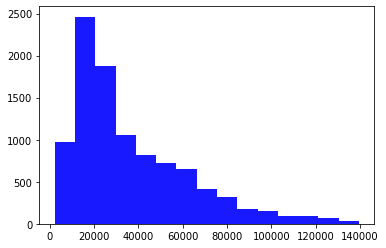

In [4]:
plt.hist(df.required_amt,
           bins = 15,
           color = 'b',
           alpha = 0.9,
           label = 'Запрошенная сумма')
plt.show()



In [5]:
income = df.monthly_income_amt[df.monthly_income_amt < df.monthly_income_amt.quantile(0.99)]

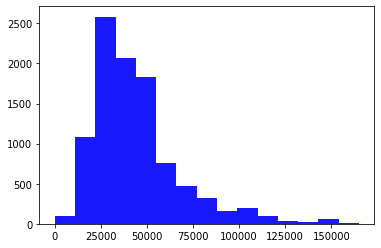

In [6]:
plt.hist(income,
           bins = 15,
           color = 'b',
           alpha = 0.9)
plt.show()

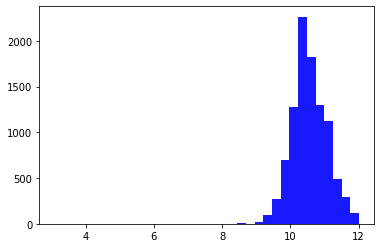

In [7]:
normed_income = np.log(income)
plt.hist(normed_income,
           bins = 35,
           color = 'b',
           alpha = 0.9)
plt.show()

In [8]:
alpha = 0.05
sample = normed_income
distr = scipy.stats.norm(sample.mean(), sample.std(ddof=1))
income_normed_pred_int = distr.ppf(alpha/2), distr.ppf(1-alpha/2)
income_normed_pred_int

(9.513910881937884, 11.602852230164311)

In [9]:
income_pred_int = np.exp(income_normed_pred_int)
income_pred_int

array([ 13546.87106511, 109409.4154998 ])

### Результат. 95% Интервал для дохода (в рублях)
##### [ 13546.87106511, 109409.4154998 ]
</br></br></br>

In [10]:
required = df.required_amt[df.required_amt < df.required_amt.quantile(0.99)]

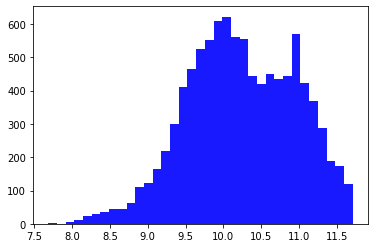

In [11]:
required = np.log(required)
plt.hist(required,
           bins = 35,
           color = 'b',
           alpha = 0.9)
plt.show()

In [12]:
sample = required
distr = scipy.stats.norm(sample.mean(), sample.std(ddof=1))
req_normed_pred_int = distr.ppf(alpha/2), distr.ppf(1-alpha/2)

In [13]:
req_normed_pred_int

(8.833212431921867, 11.640651453353586)

In [14]:
req_pred_int = np.exp(req_normed_pred_int)
req_pred_int

array([  6858.2832337, 113624.1616635])

### Результат. 95% Интервал для запрошенной суммы (в рублях)

##### [  6858.2832337, 113624.1616635]

### Результат. 95% Интервал для дохода (в рублях)
##### [ 13546.87106511, 109409.4154998 ]

#### **Вывод**: доверительные интервалы заработка и запрошенной суммы кредита не пересекаются 
